# Basic info about data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the data
df = pd.read_csv(r"C:\Users\DELL\OneDrive - UPES\Desktop\Semester 3\Elements of AIML\Assignments\Assignment 3\Student Life Survey (Responses).csv")

# Get basic information
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Timestamp                                                                                      102 non-null    object
 1   Email Address                                                                                  102 non-null    object
 2   Name                                                                                           98 non-null     object
 3   Age                                                                                            102 non-null    object
 4   Academic level                                                                                 102 non-null    object
 5   How many hours do you spend s

In [14]:
print(df.head())


            Timestamp               Email Address               Name    Age  \
0  10/9/2024 13:03:12   khushigupta3513@gmail.com             khushi  19-20   
1  10/9/2024 13:55:24    kushagradw2019@gmail.com  kushagra Dwivedi   19-20   
2  10/9/2024 13:56:41  tusharsharma2259@gmail.com      Tushar Sharma  21-22   
3  10/9/2024 13:58:58       justkartik9@gmail.com      Kartik Singh   19-20   
4  10/9/2024 13:59:32       ayanagoel45@gmail.com              Ayana  16-18   

  Academic level   \
0   Undergraduate   
1   Undergraduate   
2   Post Graduate   
3   Undergraduate   
4     High School   

  How many hours do you spend studying? (by Self or in University)  \
0                                                4-6                 
1                                                4-6                 
2                                                0-2                 
3                                                2-4                 
4                                               

# Checking Missing Values


Number of Missing Values: 51


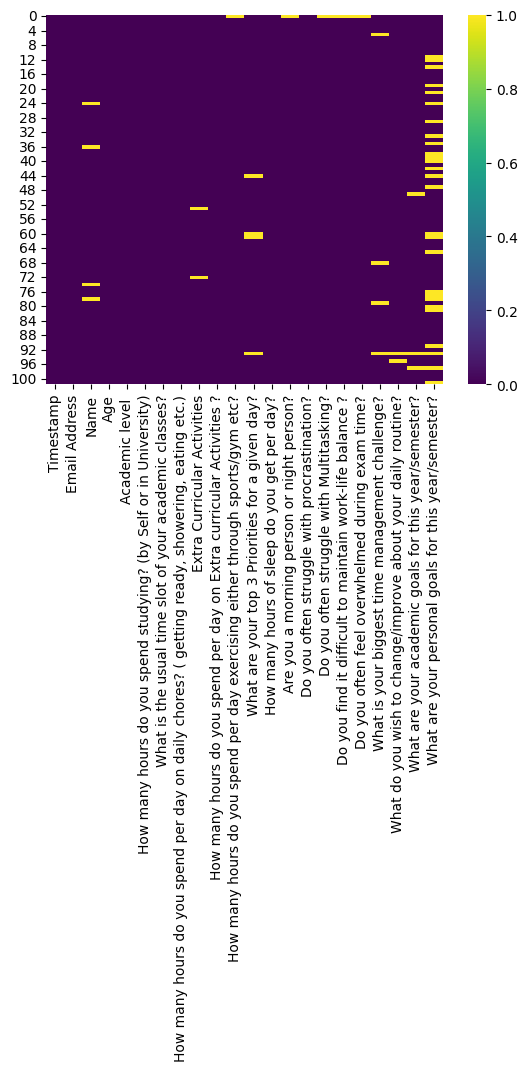

In [15]:
# Check for missing values
print("\nNumber of Missing Values:",df.isnull().sum().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

# Handling Missing Values

In [16]:
#Dropping irrelevant columns
df=df.drop(['Timestamp', 'Email Address','Name','What is your biggest time management challenge?','What do you wish to change/improve about your daily routine?','What are your academic goals for this year/semester?','What are your personal goals for this year/semester?'], axis=1)  # Drop multiple columns 

#Checking missing values after dropping columns
print("\nNumber of Missing Values:",df.isnull().sum())

#Finding mode for each column 
print(df.mode().iloc[0])

#Columns with multiple modes are stored as Series
modes=df['What is the usual time slot of your academic classes?'].mode()
modes2 =df['Extra Curricular Activities'].mode()
modes3=df['What are your top 3 Priorities for a given day?'].mode()
print(modes)
print(modes2)
print(modes3)

#Imputing missing values with their respective modes
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(mode)  # Use .loc for in-place assignment
    


Number of Missing Values: Age                                                                                              0
Academic level                                                                                   0
How many hours do you spend studying? (by Self or in University)                                 0
What is the usual time slot of your academic classes?                                            0
How many hours do you spend per day on daily chores? ( getting ready, showering, eating etc.)    0
Extra Curricular Activities                                                                      2
How many hours do you spend per day on Extra curricular Activities ?                             0
How many hours do you spend per day exercising either through sports/gym etc?                    1
What are your top 3 Priorities for a given day?                                                  4
How many hours of sleep do you get per day?                                       


Number of Missing Values: Age                                                                                              0
Academic level                                                                                   0
How many hours do you spend studying? (by Self or in University)                                 0
What is the usual time slot of your academic classes?                                            0
How many hours do you spend per day on daily chores? ( getting ready, showering, eating etc.)    0
Extra Curricular Activities                                                                      0
How many hours do you spend per day on Extra curricular Activities ?                             0
How many hours do you spend per day exercising either through sports/gym etc?                    0
What are your top 3 Priorities for a given day?                                                  0
How many hours of sleep do you get per day?                                       

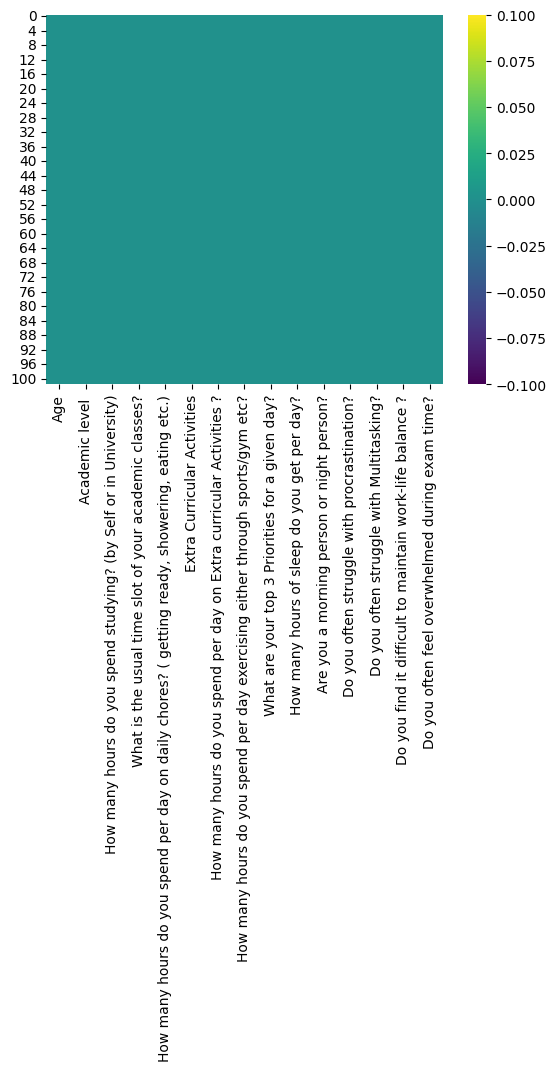

In [17]:
#Checking missing values after handling missing values
print("\nNumber of Missing Values:",df.isnull().sum())
# Visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

# Exploring Data

Frequency Distribution of Age
Age
19-20    40
21-22    33
22+      15
16-18    14
Name: count, dtype: int64


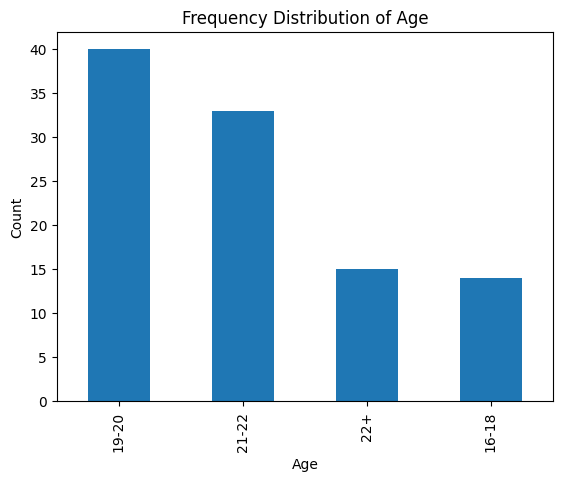

Frequency Distribution of Academic level 
Academic level 
Undergraduate                 79
Post Graduate                 12
High School                    6
PhD                            3
Chartered Accountancy          1
Jewellery designer diploma     1
Name: count, dtype: int64


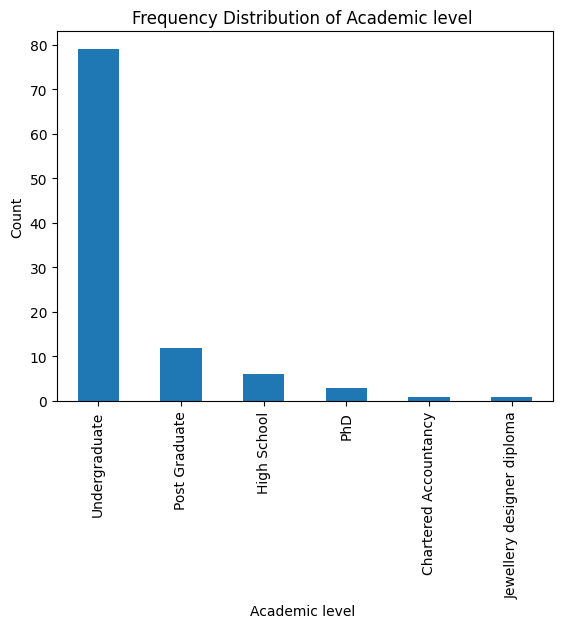

Frequency Distribution of How many hours do you spend studying? (by Self or in University)
How many hours do you spend studying? (by Self or in University)
4-6                                                                                              33
2-4                                                                                              25
0-2                                                                                              19
8+                                                                                               12
6-8                                                                                              11
Based on the work load i go from 3 back to back all nighter to roughly at avg an 1 hour a day     1
19                                                                                                1
Name: count, dtype: int64


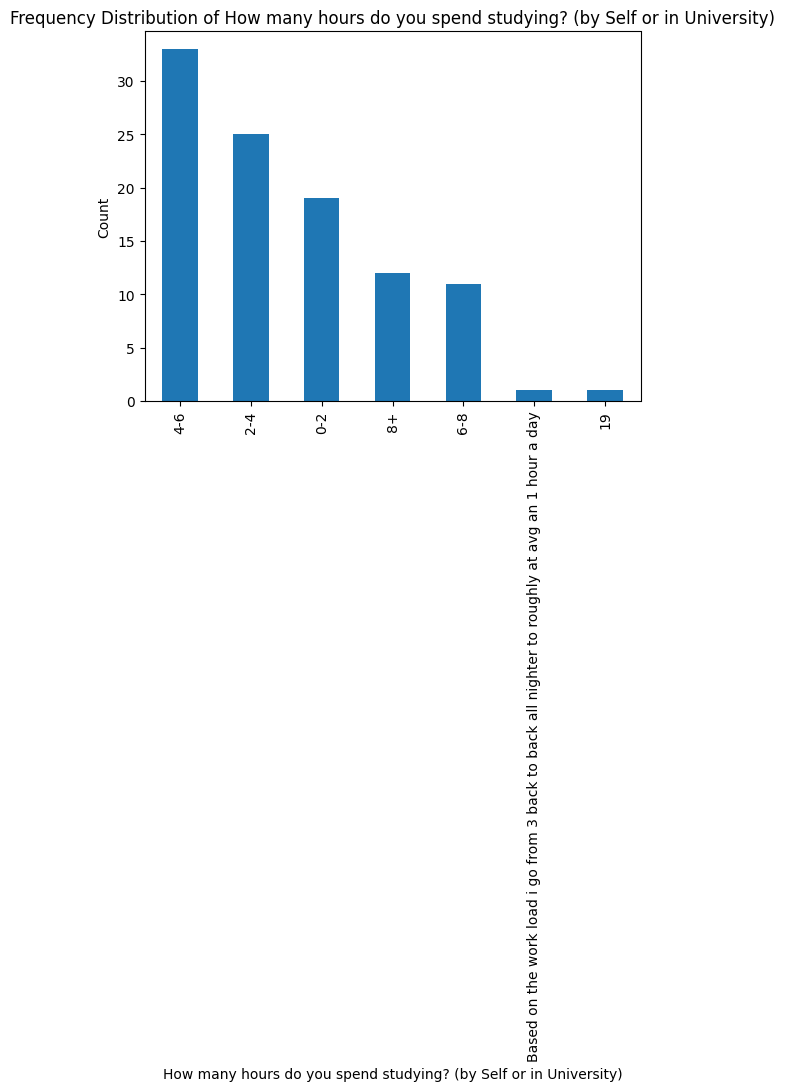

Frequency Distribution of What is the usual time slot of your academic classes?
What is the usual time slot of your academic classes?
Morning Classes (8AM -12 PM), Afternoon Classes (1 PM - 4 PM)                                             33
Flexible                                                                                                  21
Morning Classes (8AM -12 PM)                                                                              16
Afternoon Classes (1 PM - 4 PM)                                                                           11
Morning Classes (8AM -12 PM), Afternoon Classes (1 PM - 4 PM), Evening Classes (4 PM - 7 PM)               7
Afternoon Classes (1 PM - 4 PM), Flexible                                                                  3
Evening Classes (4 PM - 7 PM)                                                                              2
Morning Classes (8AM -12 PM), Afternoon Classes (1 PM - 4 PM), Flexible                                

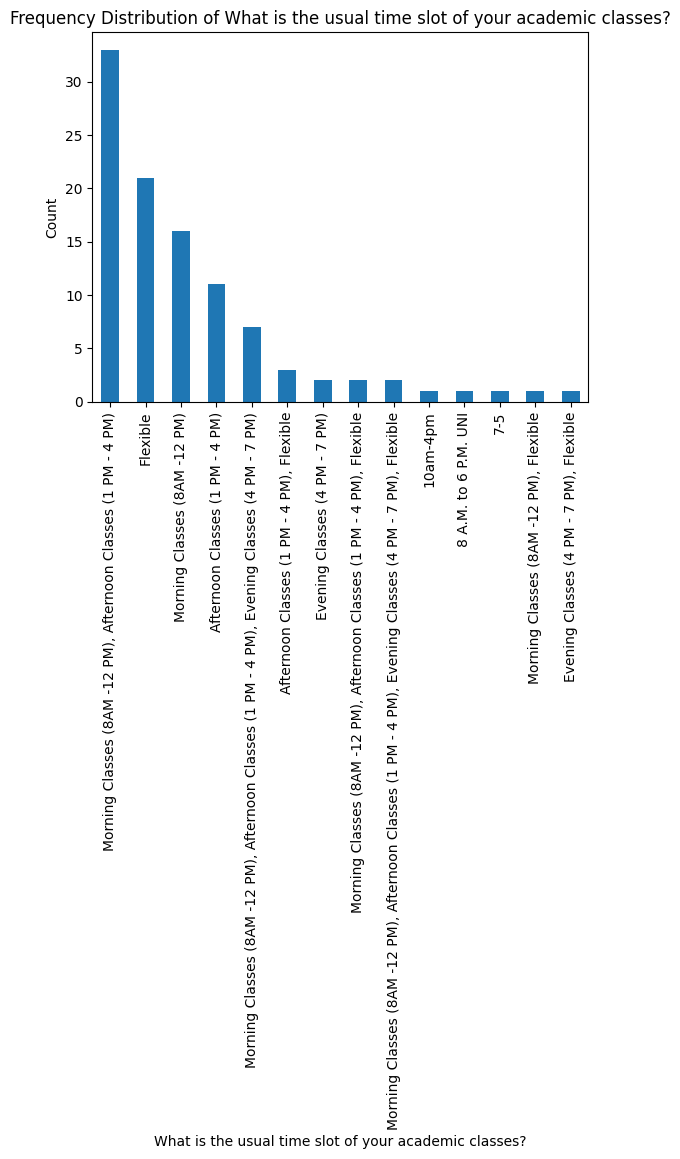

Frequency Distribution of How many hours do you spend per day on daily chores? ( getting ready, showering, eating etc.)
How many hours do you spend per day on daily chores? ( getting ready, showering, eating etc.)
1-2 hours    46
2-3 hours    31
<1 hour       9
3-4 hours     7
4-5 hours     5
5+ hours      4
Name: count, dtype: int64


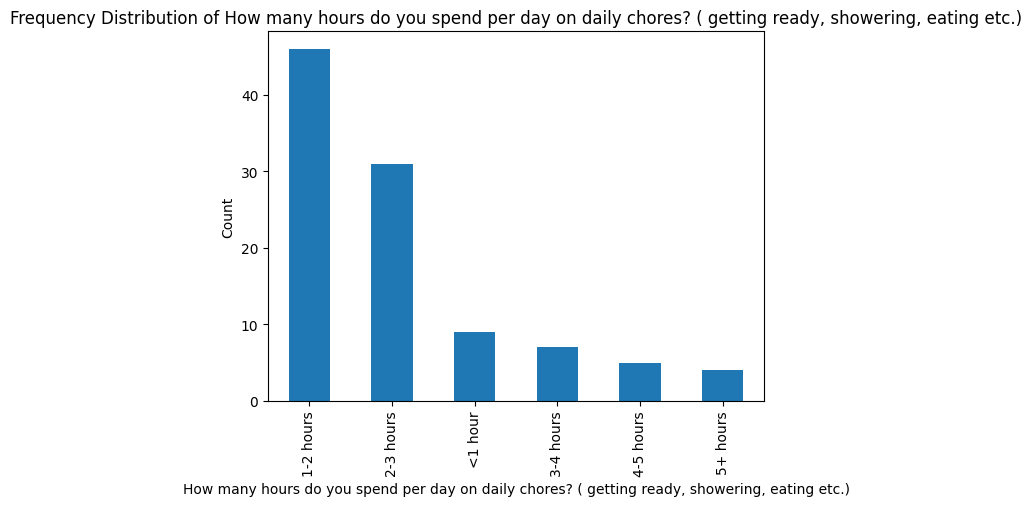

Frequency Distribution of Extra Curricular Activities
Extra Curricular Activities
College Clubs or Societies, Social Media                                                                                 11
Social Media, Games                                                                                                       6
Sports/Gym etc, Games                                                                                                     5
Sports/Gym etc, Social Media, Games                                                                                       4
College Clubs or Societies, Sports/Gym etc, Social Media                                                                  4
Sports/Gym etc                                                                                                            4
Sports/Gym etc, Social Media                                                                                              4
College Clubs or Societies, Sports/Gym etc, Course

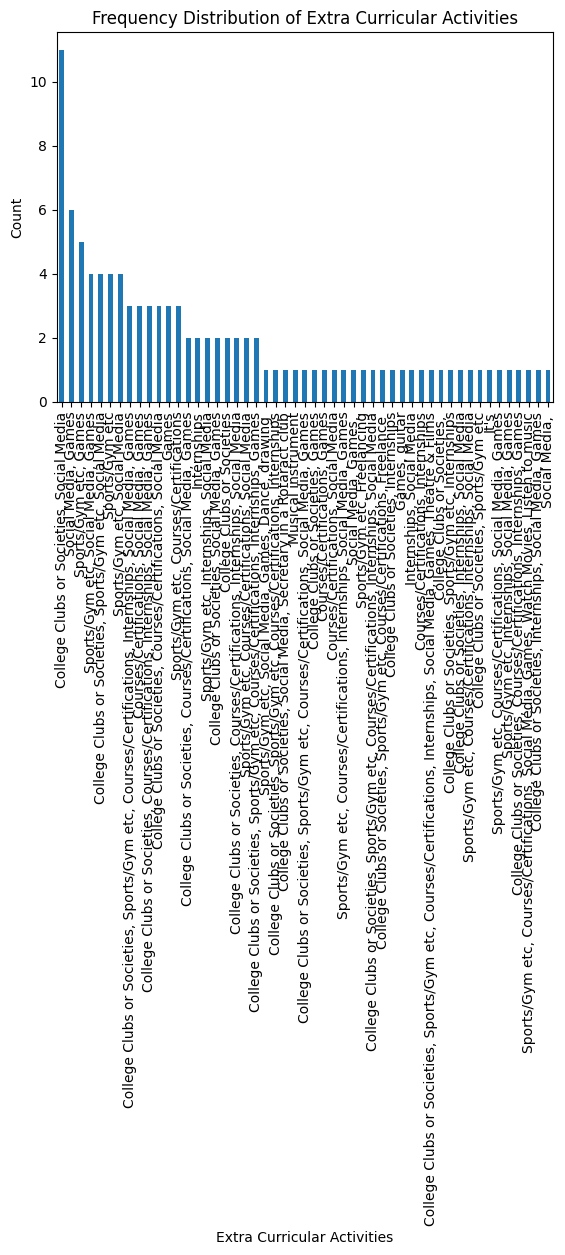

Frequency Distribution of How many hours do you spend per day on Extra curricular Activities ?
How many hours do you spend per day on Extra curricular Activities ?
1-2 hours    43
2-3 hours    27
<1 hour      16
3-4 hours     9
4+            7
Name: count, dtype: int64


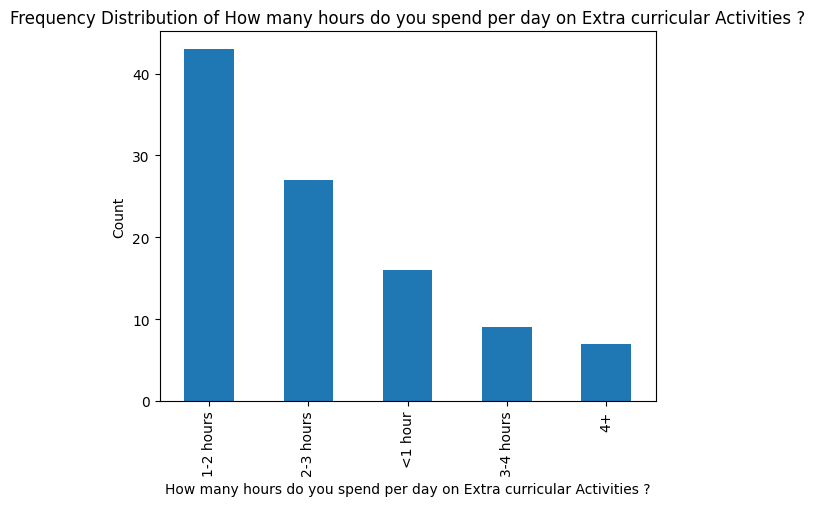

Frequency Distribution of How many hours do you spend per day exercising either through sports/gym etc?
How many hours do you spend per day exercising either through sports/gym etc?
0-2 hours    64
0            32
2-4 hours     3
4+ hours      3
Name: count, dtype: int64


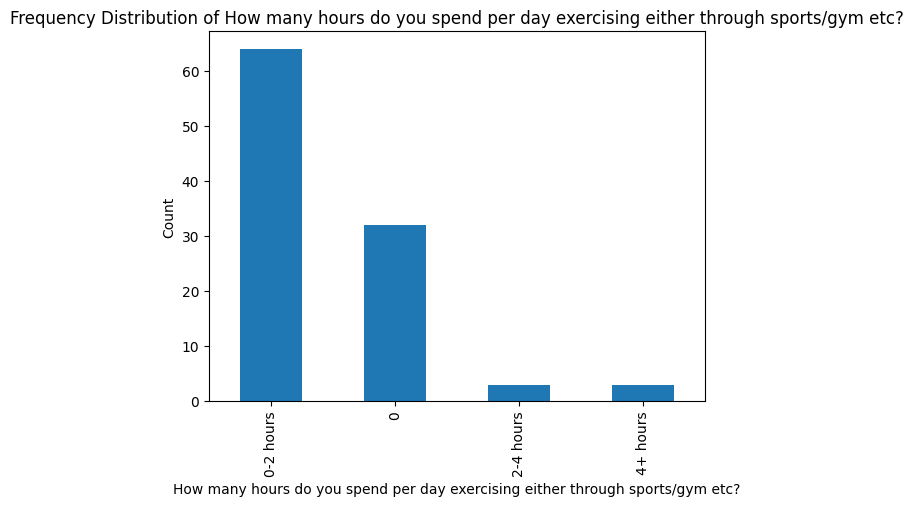

Frequency Distribution of What are your top 3 Priorities for a given day?
What are your top 3 Priorities for a given day?
Academics, College Clubs or Societies, Social Media                                         12
Academics, College Clubs or Societies, Courses/Certifications                                5
Academics, Sports/Gym/Fitness etc., Courses/Certifications                                   5
Academics, Sports/Gym/Fitness etc., Social Media                                             5
Academics, College Clubs or Societies, Sports/Gym/Fitness etc.                               4
Academics, Internships, Social Media                                                         4
Academics, College Clubs or Societies                                                        4
Academics, Social Media, Games                                                               4
Academics, Sports/Gym/Fitness etc., Internships                                              4
Academics, Courses/Cert

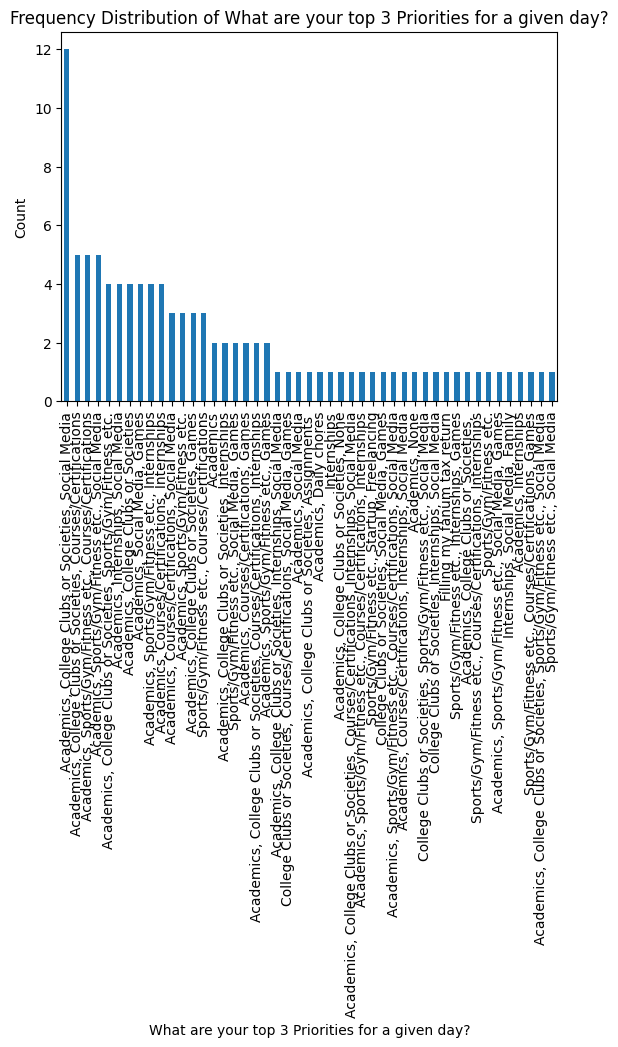

Frequency Distribution of How many hours of sleep do you get per day?
How many hours of sleep do you get per day?
4-6 hours    44
6-8 hours    39
8+ hours     10
3-4 hours     9
Name: count, dtype: int64


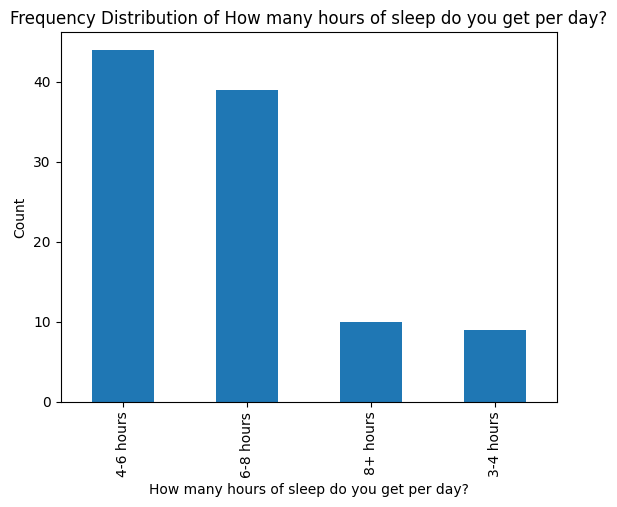

Frequency Distribution of Are you a morning person or night person?
Are you a morning person or night person?
night person      47
okay with both    43
morning person    12
Name: count, dtype: int64


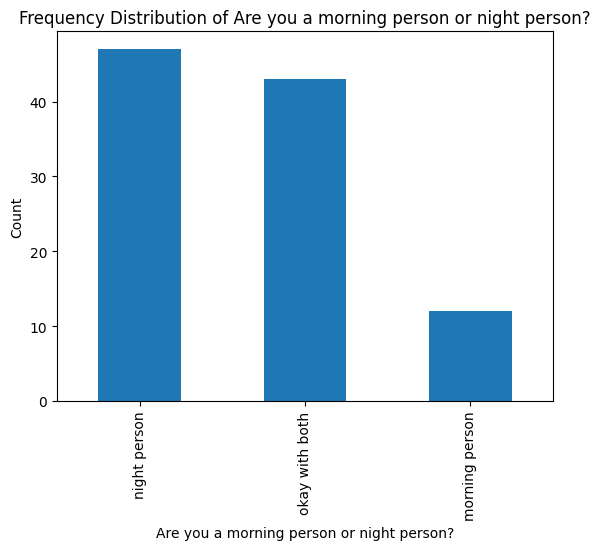

Frequency Distribution of Do you often struggle with procrastination?
Do you often struggle with procrastination?
Sometimes    37
Often        30
Always       20
Rarely       11
Never         4
Name: count, dtype: int64


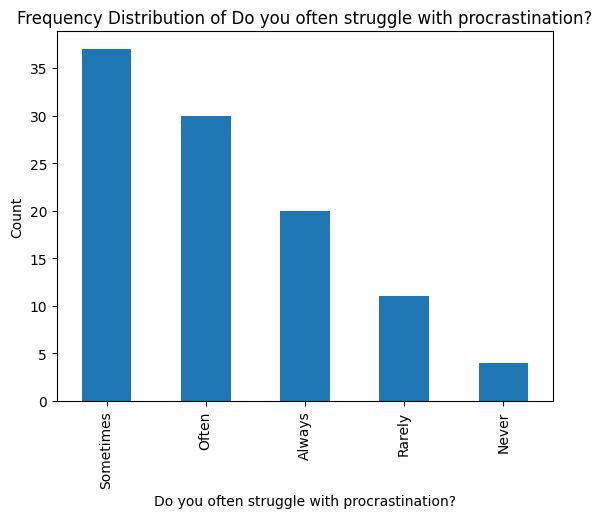

Frequency Distribution of Do you often struggle with Multitasking?
Do you often struggle with Multitasking?
Sometimes    43
Rarely       21
Never        14
Always       12
Often        12
Name: count, dtype: int64


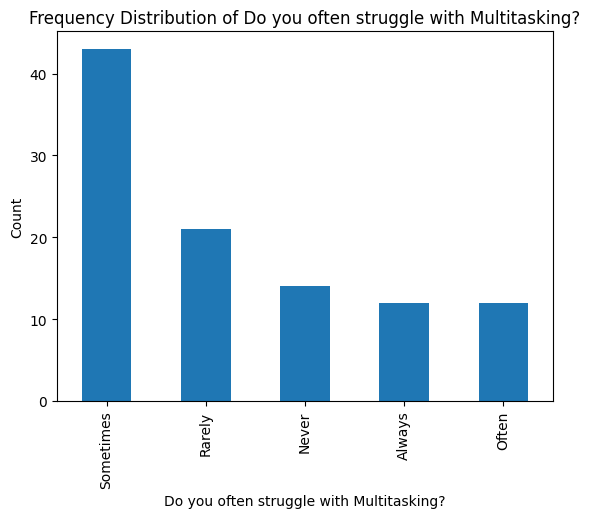

Frequency Distribution of Do you find it difficult to maintain work-life balance ?
Do you find it difficult to maintain work-life balance ?
Sometimes    50
Rarely       21
Always       12
Often        11
Never         8
Name: count, dtype: int64


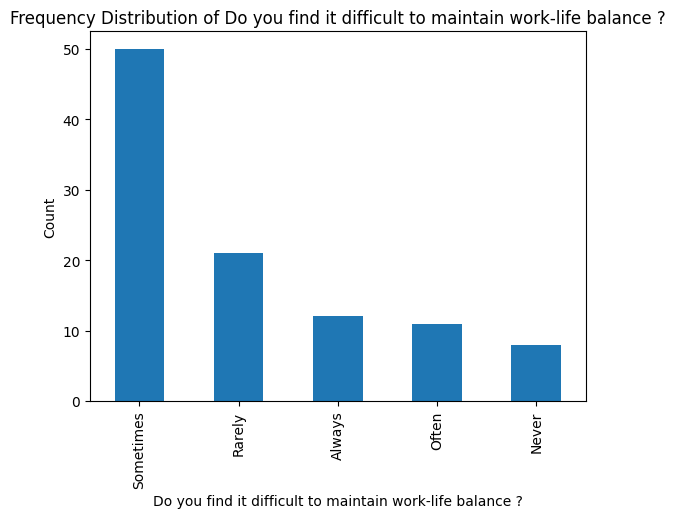

Frequency Distribution of Do you often feel overwhelmed during exam time?
Do you often feel overwhelmed during exam time?
Sometimes    29
Often        22
Always       21
Rarely       17
Never        13
Name: count, dtype: int64


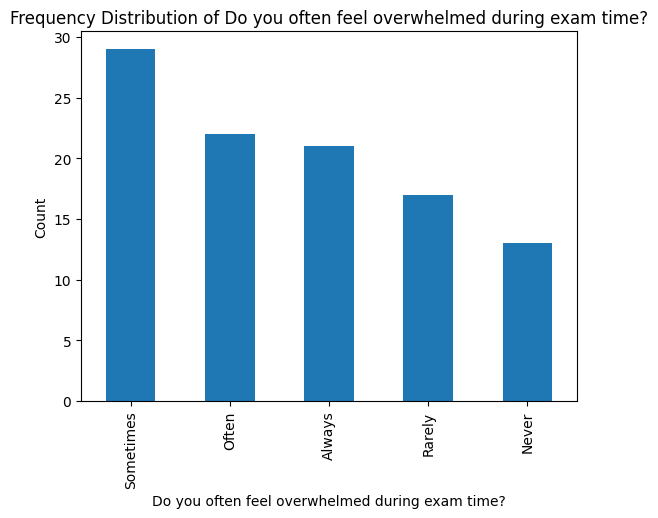

In [26]:
for col in listing:
  try:
    academic_level_counts = df[col].value_counts()
    print(f"Frequency Distribution of {col}")
    print(academic_level_counts)

    # Visualize the distribution (assuming categorical data)
    academic_level_counts.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Frequency Distribution of {col}')
    plt.show()
  except (KeyError, TypeError):
    print(f"Column '{col}' might not be categorical data. Skipping.")

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df' and the column with priorities is 'Priorities'
df['Priorities'] = df['Priorities'].str.split(',')

# Create a new DataFrame to store the expanded priorities
expanded_df = df.explode('Priorities')

# Count the occurrences of each priority
priority_counts = expanded_df['Priorities'].value_counts()

print(priority_counts)

# Relationship Among Columns

In [ ]:
cols = df.select_dtypes(include=['object']).columns

# Perform Chi-Square test for all pairs of categorical columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        if p < 0.05:
            print(f"There is a significant association between {col1} and {col2}")
        else:
            print(f"There is no significant association between {col1} and {col2}")

There is a significant association between Age and Academic level 
There is no significant association between Age and How many hours do you spend studying? (by Self or in University)
There is no significant association between Age and What is the usual time slot of your academic classes?
There is no significant association between Age and How many hours do you spend per day on daily chores? ( getting ready, showering, eating etc.)
There is no significant association between Age and Extra Curricular Activities
There is no significant association between Age and How many hours do you spend per day on Extra curricular Activities ?
There is no significant association between Age and How many hours do you spend per day exercising either through sports/gym etc?
There is no significant association between Age and What are your top 3 Priorities for a given day?
There is no significant association between Age and How many hours of sleep do you get per day?
There is no significant association b